# Exponential Weighted Moving Average (EWMA)

In [30]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

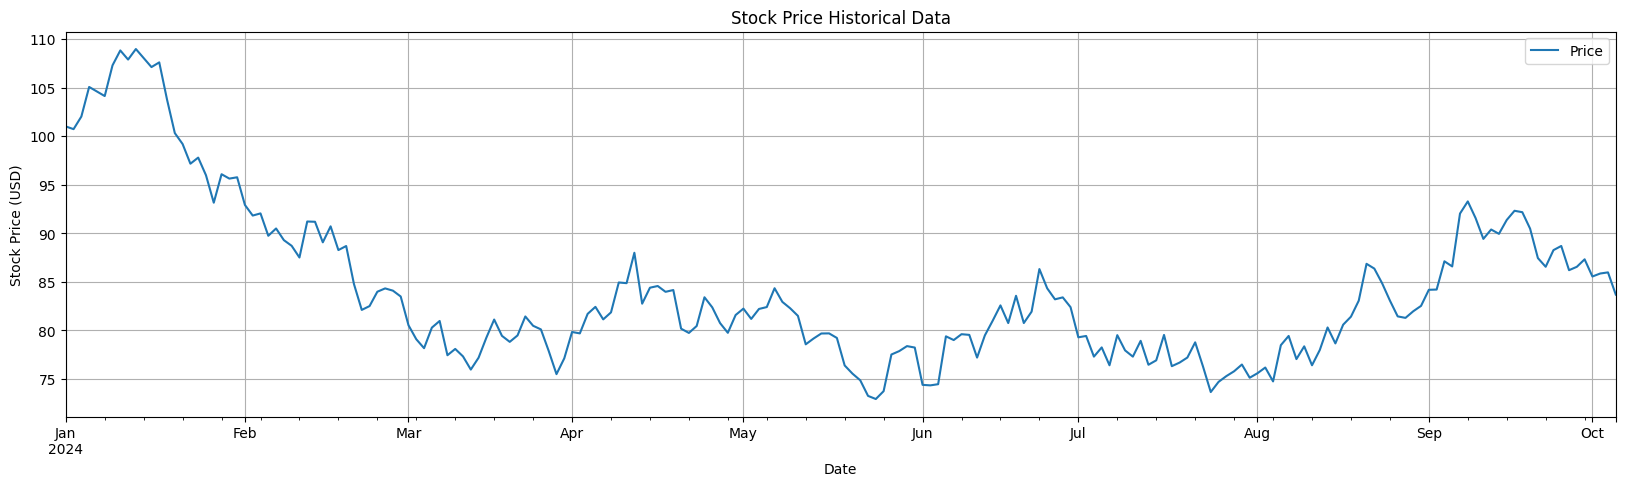

In [31]:
# Load Dataset

stocks = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/stock_price_sample_03.csv',
                      index_col = 'Date', parse_dates = True)

stocks.plot(figsize = (20,5), grid = True, ylabel = 'Stock Price (USD)', title = 'Stock Price Historical Data')
plt.show()

## EWMA Implementation

Parameters

| Parameter     | Description     | Notes:     |
|:----------|:-----------|:------------|
| com (center of Mass)   | Alternative way to specify α. com = (1/α) - 1     | Use only one: com, span, halflife, or alpha     |
| span   | Controls smoothing: α = 2 / (span + 1)     | Higher span = slower response     |
| halflife   | Defines the time it takes for a weight to reduce by half.      | α = 1 - e^(-ln(2) / halflife)      |
| alpha    | Directly set smoothing factor (0 < α ≤ 1).      | Most explicit way to set smoothing.      |
| min_periods    | Minimum number of observations<br>required before returning a value.    | Default is 0 (returns values from the start).   |
| adjust  | True: Normalize weights (default) <br> Weights are normalized so that they sum to 1. <br> It behaves like weighted moving average,<br>with older values still contributing     | False: Uses simpler recursion formula (faster). <br> Uses a simplified recursive formula that does not normalize past values. <br> It treats it as a direct exponential smoothing <br> Puts more emphasis on the most recent values,<br>making it more responsive to changes |
| ignore_na   | True: Ignores NaNs when computing the moving average.      | Default is False (NaNs affect calculations).    |
| axis   | Specifies axis for calculation.     | Default: 0 (row-wise for Series/DataFrame).    |
| times    | Uses a time series index for weight computation.     | Useful for irregular time intervals.|

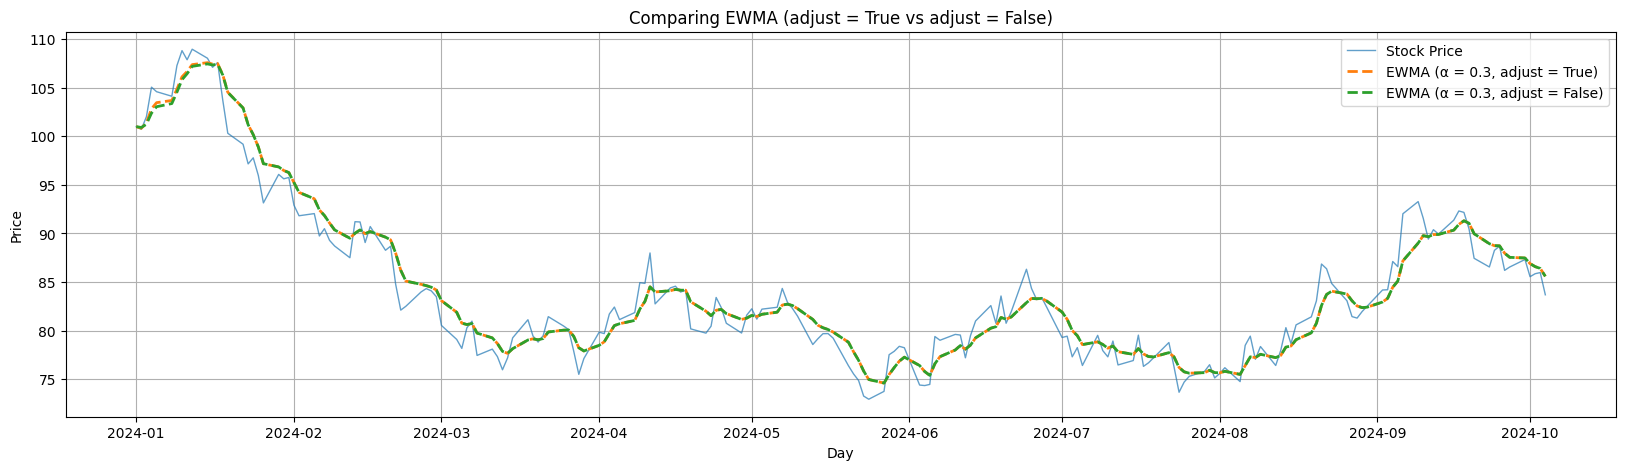

In [32]:
# Compute EWMA with alpha = 0.3 and adjust = False

ewma_03T = 'EWMA_03_T'
ewma_03F = 'EWMA_03_F'

stocks[ewma_03T] = stocks['Price'].ewm(alpha = 0.3, adjust = True).mean()
stocks[ewma_03F] = stocks['Price'].ewm(alpha = 0.3, adjust = False).mean()

# Plot comparison between adjust=True and adjust = False

plt.figure(figsize = (20, 5))

plt.plot(stocks.index, stocks['Price'], label='Stock Price', linewidth = 1, alpha = 0.7)
plt.plot(stocks.index, stocks[ewma_03T], label = 'EWMA (α = 0.3, adjust = True)', linewidth = 2, linestyle = 'dashed')
plt.plot(stocks.index, stocks[ewma_03F], label = 'EWMA (α = 0.3, adjust = False)', linewidth = 2, linestyle = 'dashed')

plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Comparing EWMA (adjust = True vs adjust = False)')
plt.legend()
plt.grid()
plt.show()

<Axes: xlabel='Date'>

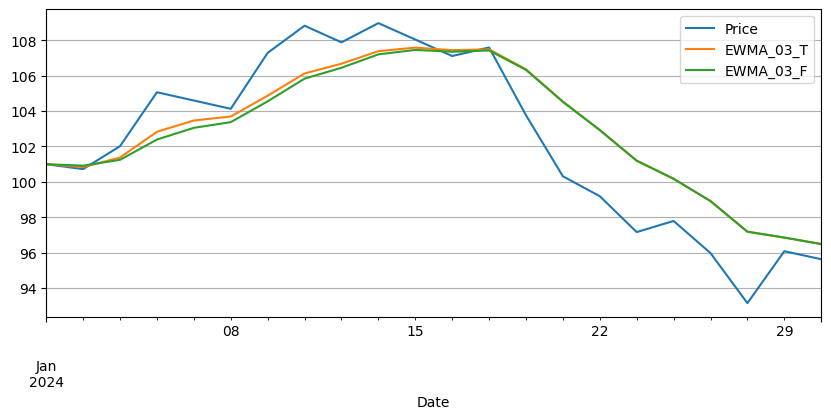

In [33]:
# Zoomed-In

stocks.loc['2024-01-01': '2024-01-30'].plot(figsize = (10,4), grid = True)

# EWMA_03_T is much closer because the adjust = True considers the old value to still contribute

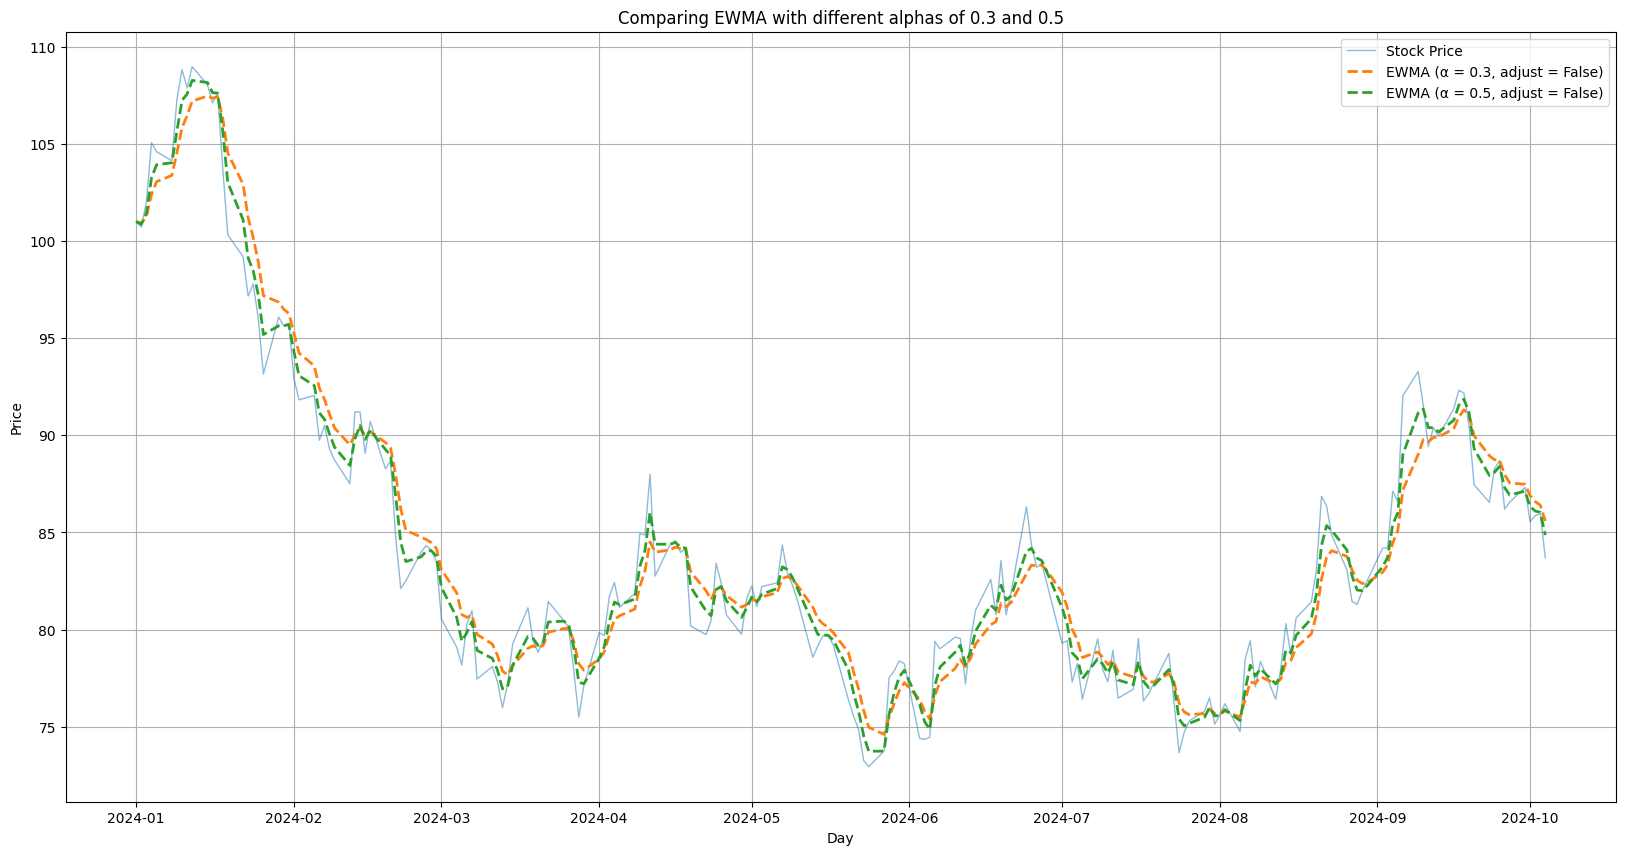

In [34]:
# Compute EWMA with alpha = 0.5 and adjust = False

ewma_05F = 'EWMA_05_F'

stocks[ewma_05F] = stocks['Price'].ewm(alpha = 0.5, adjust = False).mean()

# Plot comparison between adjust=True and adjust = False

plt.figure(figsize = (20, 10))

plt.plot(stocks.index, stocks['Price'], label='Stock Price', linewidth = 1, alpha = 0.5)
plt.plot(stocks.index, stocks[ewma_03F], label = 'EWMA (α = 0.3, adjust = False)', linewidth = 2, linestyle = 'dashed')
plt.plot(stocks.index, stocks[ewma_05F], label = 'EWMA (α = 0.5, adjust = False)', linewidth = 2, linestyle = 'dashed')

plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Comparing EWMA with different alphas of 0.3 and 0.5')
plt.legend()
plt.grid()
plt.show()

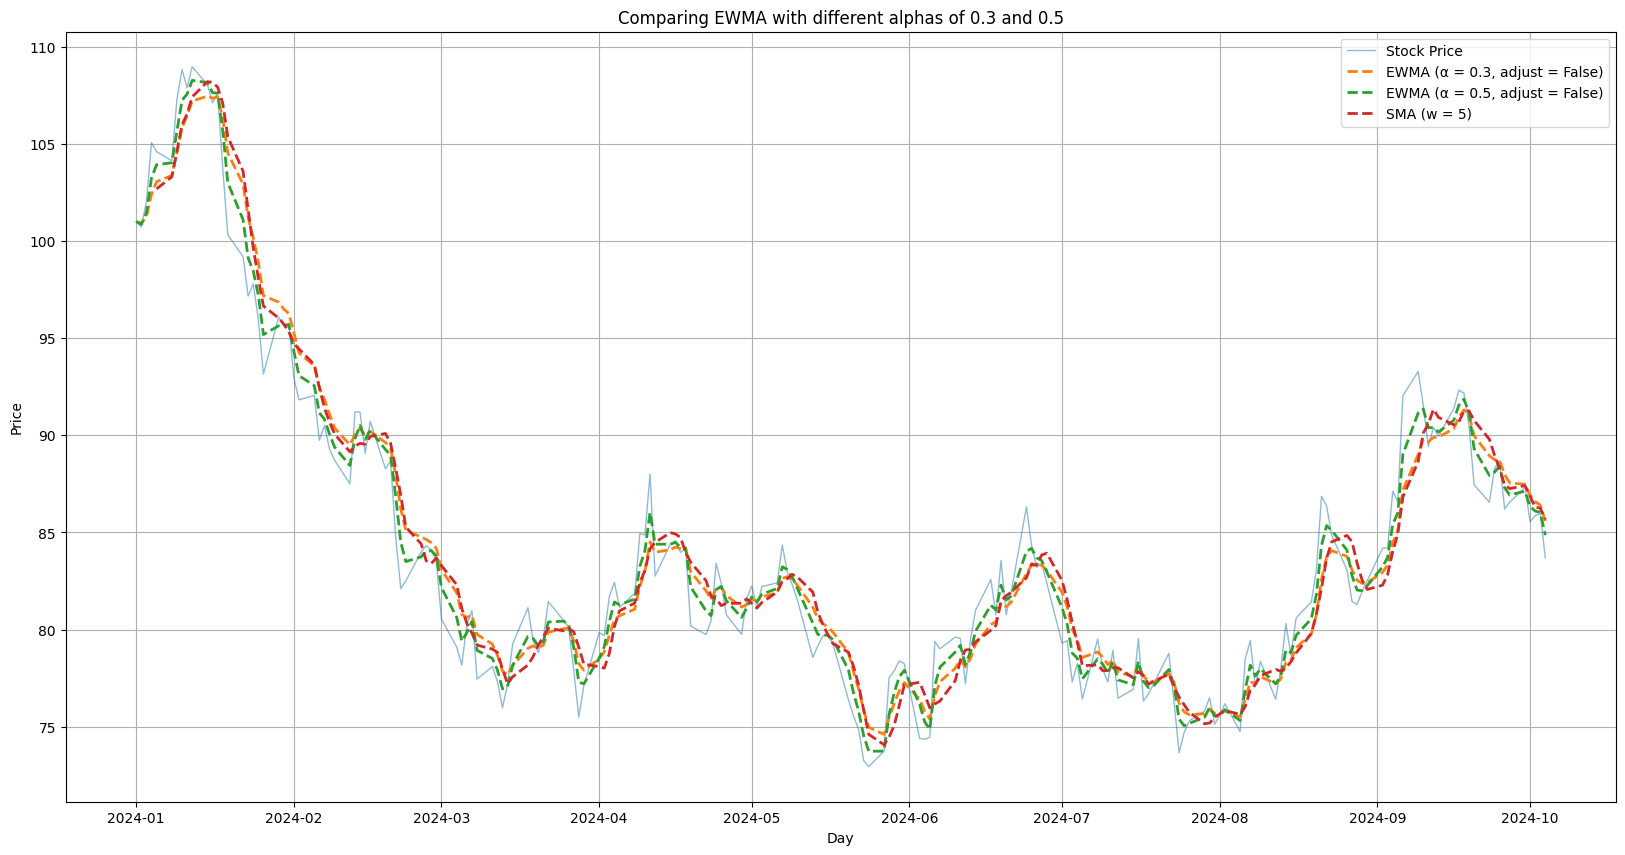

In [35]:
# Compute EWMAs with SMA

sma_w5 = 'SMA_W5'

stocks[sma_w5] = stocks['Price'].rolling(window = 5).mean()

# Plot comparison between adjust=True and adjust = False

plt.figure(figsize = (20, 10))

plt.plot(stocks.index, stocks['Price'], label='Stock Price', linewidth = 1, alpha = 0.5)
plt.plot(stocks.index, stocks[ewma_03F], label = 'EWMA (α = 0.3, adjust = False)', linewidth = 2, linestyle = 'dashed')
plt.plot(stocks.index, stocks[ewma_05F], label = 'EWMA (α = 0.5, adjust = False)', linewidth = 2, linestyle = 'dashed')
plt.plot(stocks.index, stocks[sma_w5], label = 'SMA (w = 5)', linewidth = 2, linestyle = 'dashed')


plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Comparing EWMA with different alphas of 0.3 and 0.5')
plt.legend()
plt.grid()
plt.show()

<Axes: xlabel='Date'>

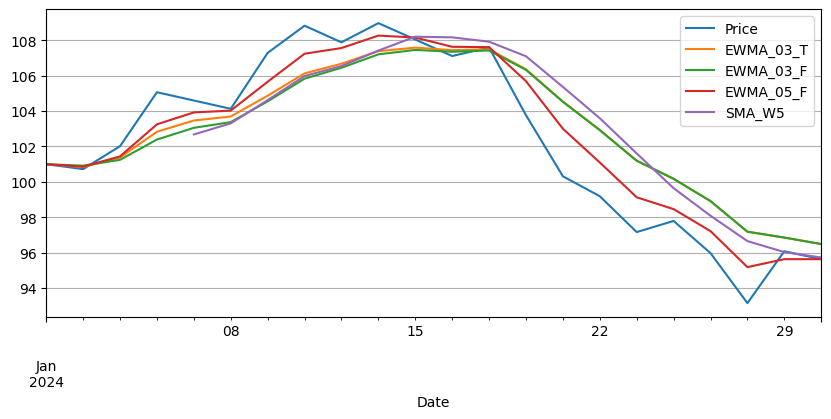

In [36]:
# Zoomed-In

stocks.loc['2024-01-01': '2024-01-30'].plot(figsize = (10,4), grid = True)

In [37]:
# A. SMA lags Behind Trends
# Problem: SMA equally weights all past values, meaning it reacts slowly to new price movements.

# Example:
# If the price suddenly drops, SMA will take longer to reflect this change.
# EWMA, on the other hand, assigns higher weights to recent prices, so it adjusts much faster.
# Impact: SMA misses turning points in trends, while EWMA quickly adapts.

# ----

# B. SMA Ignores the Most Recent Data's Importance
# Problem: SMA treats old and new data the same, meaning a price from 20 days ago has the same impact as today’s price.

# Example:
# Imagine a 10-day SMA:
# The average is based on 10 past prices, dropping the oldest price each day.
# A sudden price spike today barely affects the SMA because it's diluted by the past 9 days.
# EWMA gives recent data more weight, making it more responsive.
# Impact: EWMA better reflects conditions right now, while SMA is stale.

# ----

# C. SMA Discards Useful Old Data Too Abruptly

# Example:
# Suppose we have a 10-day SMA.
# On Day 11, the SMA completely removes Day 1’s price instead of gradually reducing its impact.
# EWMA gradually decreases the weight of older values instead of an abrupt cut-off.
# Impact: EWMA provides a smoother, more natural trend, while SMA introduces artificial jumps.

# ----

# D. SMA is Bad for Forecasting
# Problem: Since SMA treats all values equally, it cannot predict future trends well.

# Example:
# In forecasting models, recent trends matter more.
# EWMA helps with momentum tracking, whereas SMA lags too much.
# Impact: EWMA is more predictive, while SMA just looks at raw history without understanding trends.

## Why is the Best Practice Range 0.2 - 0.5?

In real-world applications, α values between 0.2 and 0.5 work best because they provide a balance between smoothness and responsiveness.

### Effects of α = 0.2 to 0.5:

1. Smooth Enough to Remove Noise

 - These values keep short-term fluctuations under control.
 - Small market spikes don’t cause overreaction.

2. Fast Enough to Detect Trends

 - Unlike SMA, EWMA with α = 0.2 - 0.5 reacts to new data faster but without being too aggressive.

### Better for Forecasting

- Financial models, weather forecasting, and anomaly detection all prefer a balanced α.
- Common industry choices:
 - α = 0.2 → Used for long-term trend tracking.
 - α = 0.3 - 0.5 → Used in trading and short-term forecasting.

### Conclusion:

If α is too low (≤ 0.1) → EWMA is too slow, like SMA.

If α is too high (≥ 0.9) → EWMA is too fast, like noisy raw data.
α = 0.2 - 0.5 is the sweet spot